In [28]:
import pandas as pd
import numpy as np
import mlp_tensorflow as mlp_tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings

plt.style.use('seaborn')
warnings.filterwarnings('ignore')

## Data

In [2]:
data = pd.read_csv('data/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
mapping = {'Species': {'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 3}}
data.replace(mapping, inplace=True)

In [4]:
X = data.iloc[:,1:5].values
y = data.iloc[:,5].values

In [5]:
enc =  LabelEncoder()

y1 = enc.fit_transform(y)

Y = pd.get_dummies(y1).values

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

print('-'*30)
print('x :',x_train.shape, x_test.shape)
print('y :',y_train.shape, y_test.shape)
print('-'*30)

------------------------------
x : (120, 4) (30, 4)
y : (120, 3) (30, 3)
------------------------------


## Model

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

Using TensorFlow backend.


In [71]:
f_atv = 'relu' #tanh
taxa = 0.0004

def SimpleMLP(shape, classes):
    '''
    simple mlp for multiclass classification
    '''
    model = Sequential()
    model.add(Dense(10,input_shape=(shape,),activation=f_atv))
    model.add(Dense(8,activation=f_atv))
    model.add(Dense(6,activation=f_atv))
    model.add(Dense(classes, activation='softmax'))
    
    model.compile(Adam(lr=taxa),'categorical_crossentropy',metrics=['accuracy'])
    #model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
    return model


def plot_log_train(acc, loss):
    plt.figure(figsize=(12,5))
    plt.plot(loss, '-o', label='Loss')
    plt.plot(acc, '-o', label='Acurácia')
    plt.legend(fontsize=12)
    plt.show()

In [72]:
model = SimpleMLP(x_train.shape[1], 3)

CPU times: user 7.35 s, sys: 549 ms, total: 7.9 s
Wall time: 4.03 s


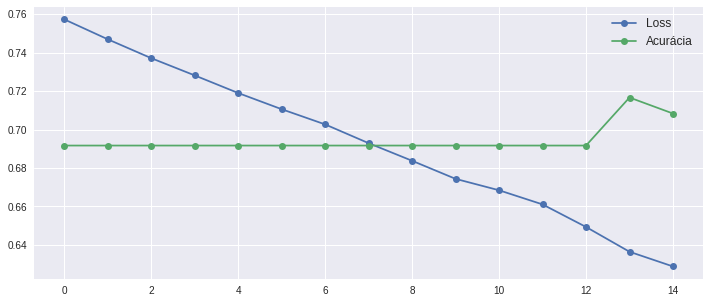

In [75]:
%time hist = model.fit(x=x_train, y=y_train, batch_size=1, epochs=15, verbose=0)

plot_log_train(hist.history['acc'], hist.history['loss'])

In [76]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: %.2f' %score[0])
print('Test accuracy: % .2f' %(score[1]*100))

Test loss: 0.68
Test accuracy:  56.67
